<a href="https://colab.research.google.com/github/moemag/-Image-Cartoonifying-Road-Lane-Detection-/blob/main/Image-Cartoonifying-Road-Lane-Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [ ]:
from google.colab import drive

from math import hypot, pi, cos, sin, ceil
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
drive.mount('/content/drive')
img_src = '/content/drive/My Drive/Computer Vision/Assignment1/vision.png'

Mounted at /content/drive


# **Cartoonifying**

**Reading Image**

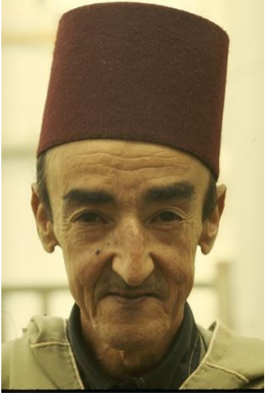

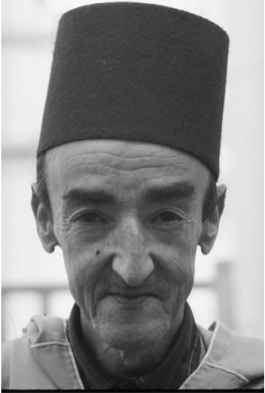

In [ ]:
BGR_img = cv2.imread(img_src)
gray_image = cv2.cvtColor(BGR_img, cv2.COLOR_BGR2GRAY, 0)
# Showing image
cv2_imshow(BGR_img)
# Showing gray image
cv2_imshow(gray_image)

**Noise Reduction**

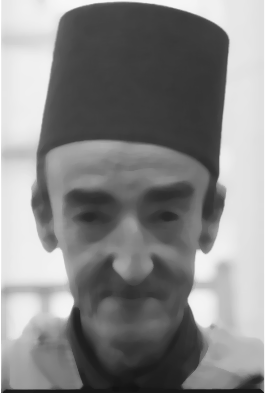

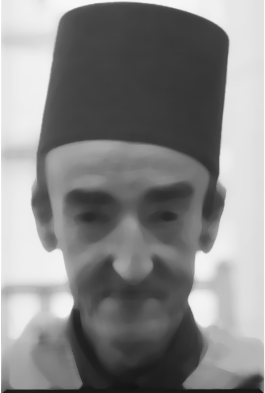

In [ ]:
smoothed_gray_9 = cv2.medianBlur(gray_image, 9)
cv2_imshow(smoothed_gray_9)
smoothed_gray_11 = cv2.medianBlur(gray_image, 11)
cv2_imshow(smoothed_gray_11)

**Edge Detection**

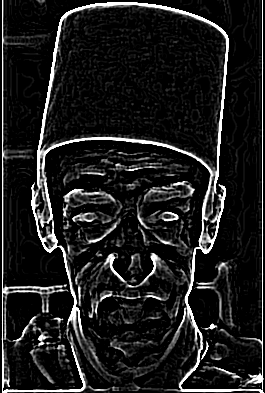

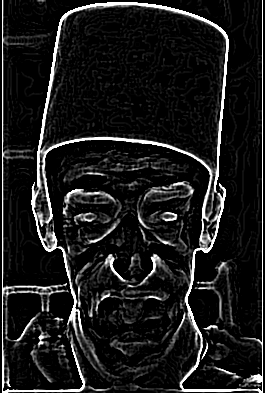

In [ ]:
ddepth = cv2.CV_8U
lap_img_9 = cv2.Laplacian(src=smoothed_gray_9, ddepth=ddepth, ksize=5)
cv2_imshow(lap_img_9)
ddepth = cv2.CV_8U
lap_img_11 = cv2.Laplacian(src=smoothed_gray_11, ddepth=ddepth, ksize=5)
cv2_imshow(lap_img_11)

**Threshold & Bilateral**

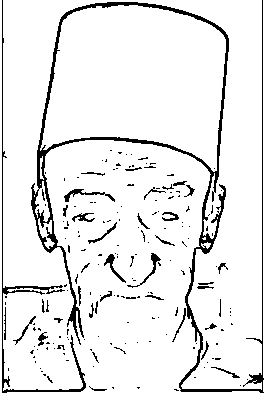

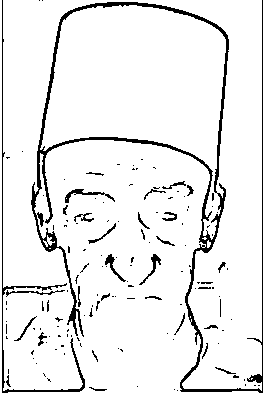

In [ ]:
ret, thresh_9 = cv2.threshold(lap_img_9, thresh=125, maxval=255, type=cv2.THRESH_BINARY_INV)
cv2_imshow(thresh_9)
ret, thresh_11 = cv2.threshold(lap_img_11, thresh=125, maxval=255, type=cv2.THRESH_BINARY_INV)
cv2_imshow(thresh_11)

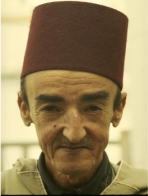

In [ ]:
img = BGR_img
height , width, _ = img.shape
img = cv2.resize(img, (0,0), fx=0.56, fy=0.5, interpolation = cv2.INTER_AREA)
cv2_imshow(img)

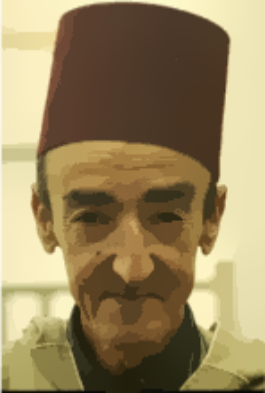

In [ ]:
# repetitions for stronger cartoon effect
REPETITIONS = 160
# filter size
ksize = 9
# Filter color strength
sigmaColor = 9
# spatial strength
sigmaSpace = 9

for i in range(REPETITIONS):
    img = cv2.bilateralFilter(img , ksize, sigmaColor , sigmaSpace)

img = cv2.resize(img, (width, height))
cv2_imshow(img)

**Cartoonifying**

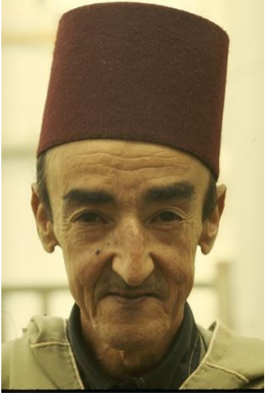

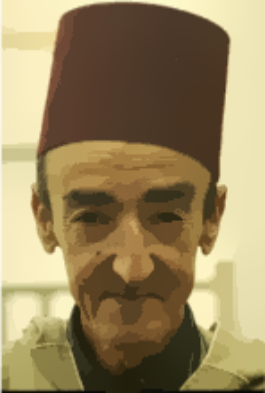

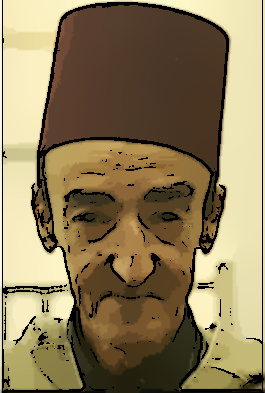

In [ ]:
cartoon=cv2.bitwise_and(img, img, mask=thresh_9)
cv2_imshow(BGR_img)
cv2_imshow(img)
cv2_imshow(cartoon)


# **Road Lane Detection**

In [ ]:
img_src1 = '/content/drive/My Drive/Computer Vision/Assignment1/testHough1.png'
img_src2 = '/content/drive/My Drive/Computer Vision/Assignment1/testHough.jpg'

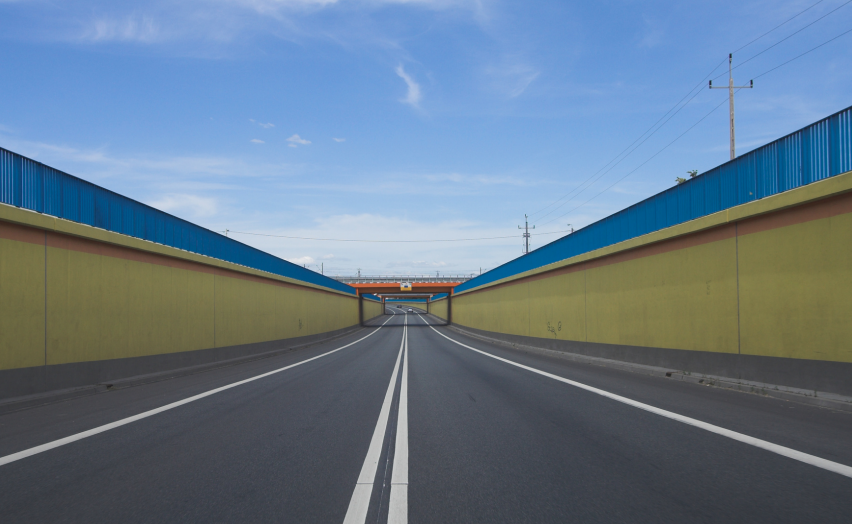

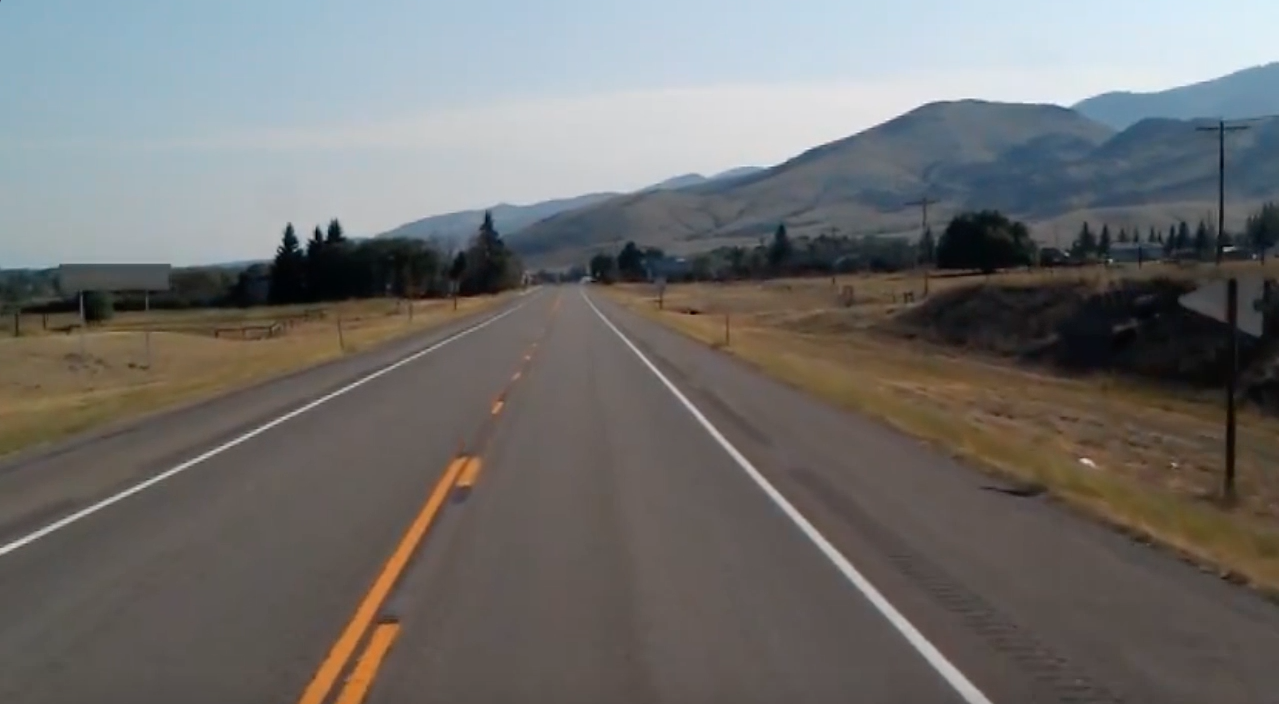

In [ ]:
roadImg_1 = cv2.imread(img_src1)
roadImg_2 = cv2.imread(img_src2)
# Resize_img_1 = cv2.resize(roadImg_1, (0,0), fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
# Resize_img_2 = cv2.resize(roadImg_2, (0,0), fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
cv2_imshow(roadImg_1)
cv2_imshow(roadImg_2)

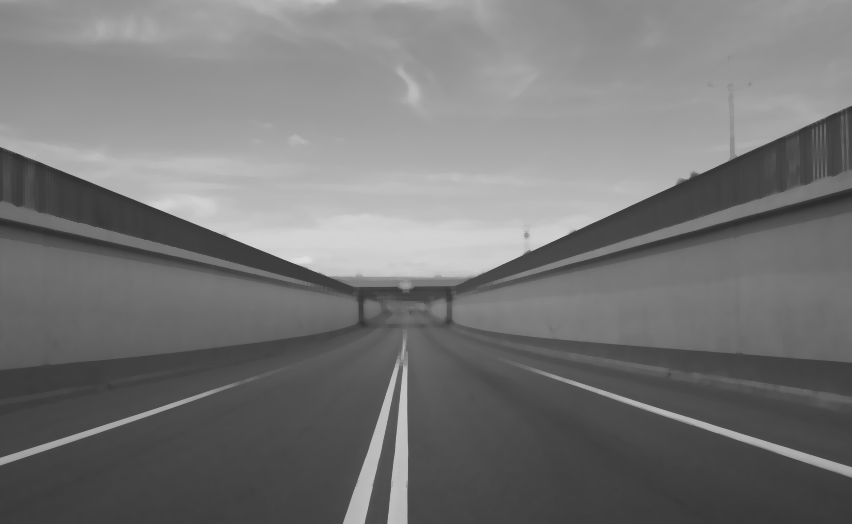

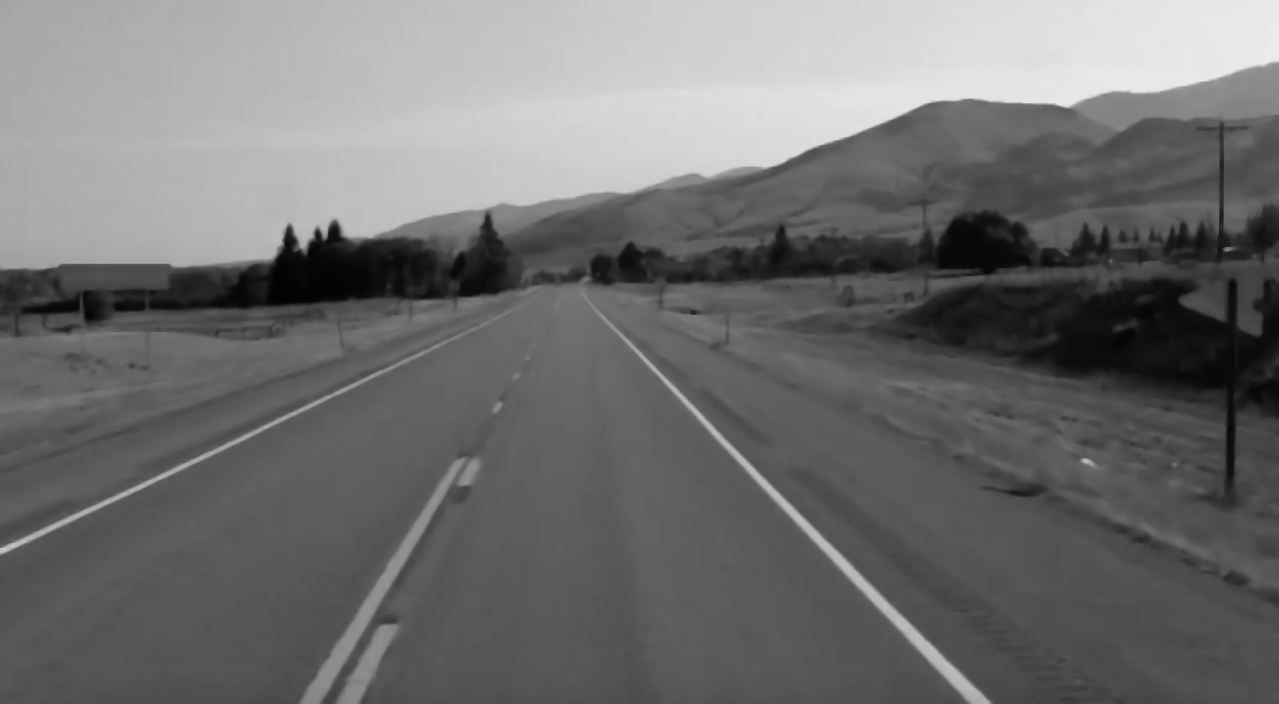

In [ ]:
gray_image_1 = cv2.cvtColor(roadImg_1, cv2.COLOR_BGR2GRAY, 0)
gray_image_2 = cv2.cvtColor(roadImg_2, cv2.COLOR_BGR2GRAY, 0)
smoothed_gray_1 = cv2.medianBlur(gray_image_1, 7)
smoothed_gray_2 = cv2.medianBlur(gray_image_2, 5)
cv2_imshow(smoothed_gray_1)
cv2_imshow(smoothed_gray_2)

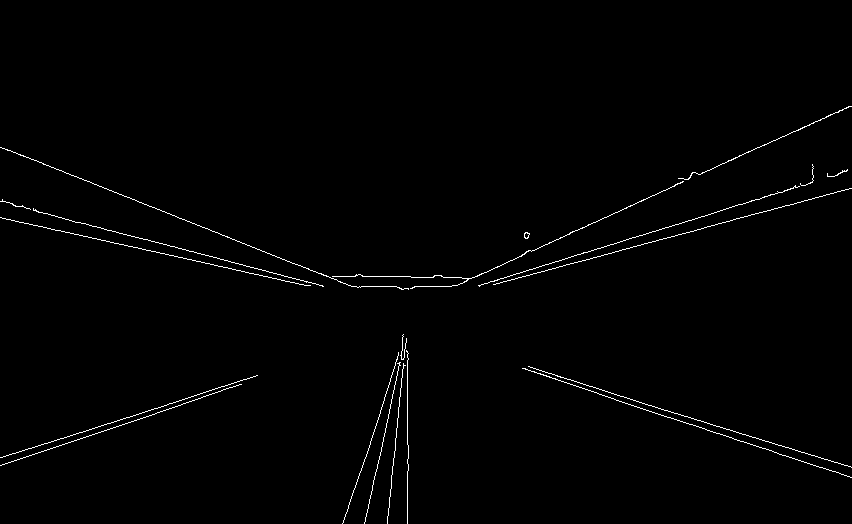

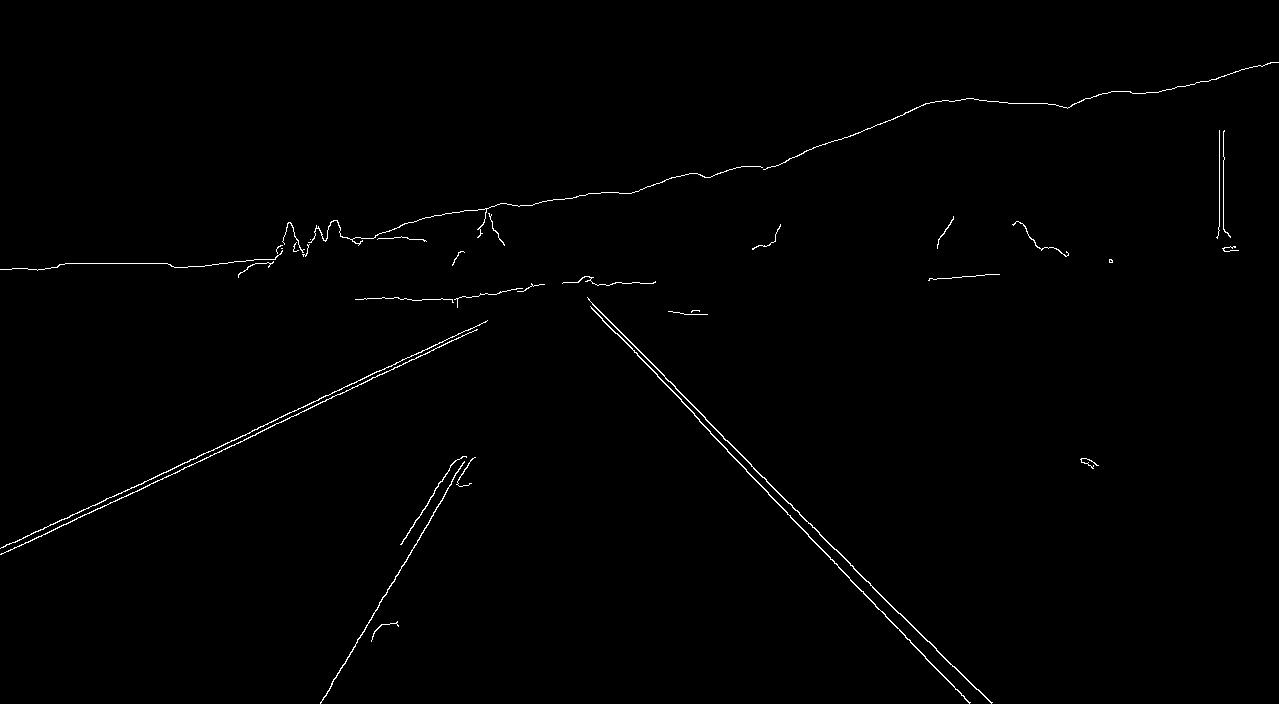

In [ ]:
RIO_img_1 = cv2.Canny(smoothed_gray_1,80,200)
RIO_img_2 = cv2.Canny(smoothed_gray_2,80,200)
cv2_imshow(RIO_img_1)
cv2_imshow(RIO_img_2)

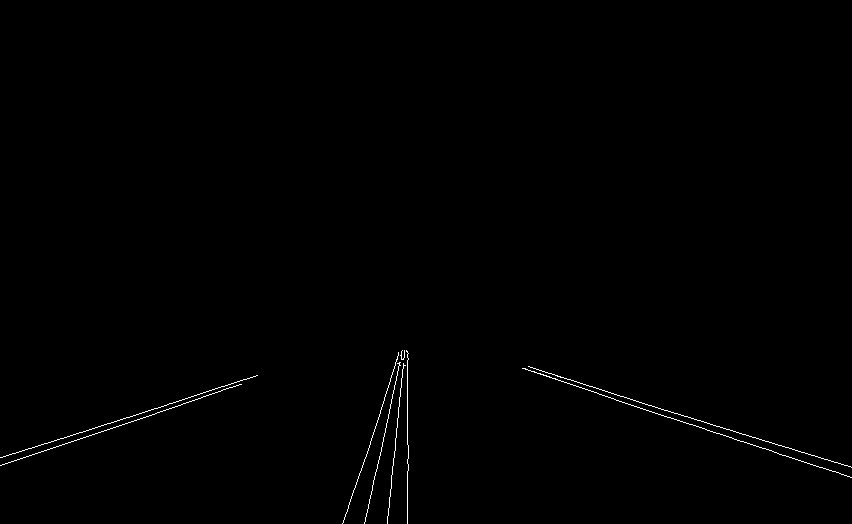

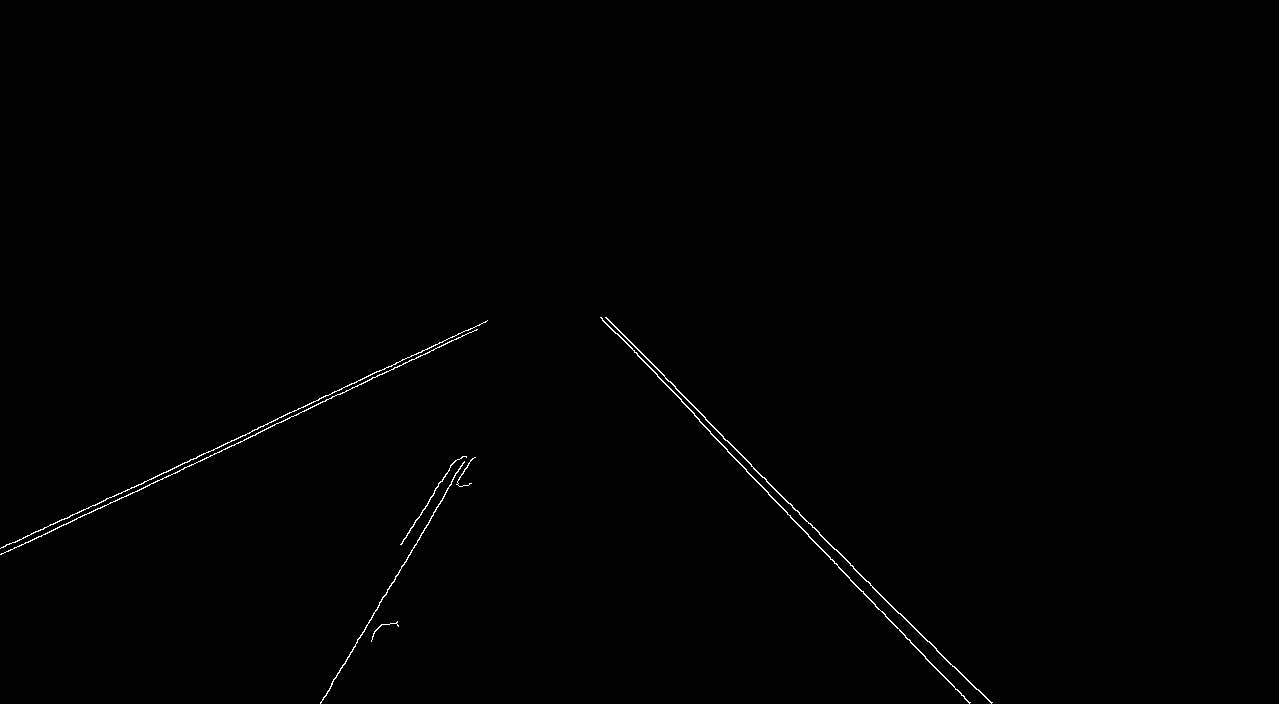

In [ ]:
###PIC1
height, width = RIO_img_1.shape

square = np.array([ [(0, 350), (0, height), (width, height),  (width, 350) ] ])

mask = np.zeros_like(RIO_img_1)
cv2.fillPoly(mask, square, 255)

region_interest_1 =  cv2.bitwise_and(RIO_img_1, mask)

###PIC2

height, width = RIO_img_2.shape

square = np.array([ [(0, 317), (0, height), (1050, height),  (1050, 317) ] ])

mask = np.zeros_like(RIO_img_2)
cv2.fillPoly(mask, square, 255)

region_interest_2 =  cv2.bitwise_and(RIO_img_2, mask)
###SHOW IMAGES
cv2_imshow(region_interest_1)
cv2_imshow(region_interest_2)

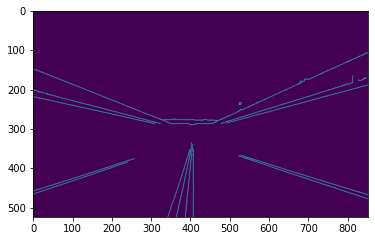

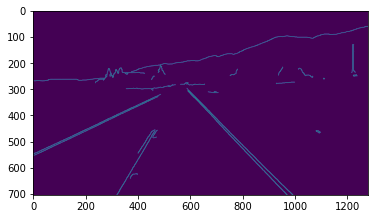

In [ ]:
plt.imshow(RIO_img_1)
plt.show()
plt.imshow(RIO_img_2)
plt.show()

# **Hough**

In [ ]:
def myHoughLines(img,angle,threshold):
	lines = []
	y_idxs, x_idxs = np.nonzero(img) # to get indices of edges
	thetas = angle*(np.arange(0, (np.pi/(angle)))) #angles
	cos_t = np.cos(thetas) #cos vector
	sin_t = np.sin(thetas) #sin vector

	all_lines = {} #dict (accumulator)
	for t in range(len(thetas)): # for each angle  --> take all edges
		for i in range(y_idxs.size): # for each edge
			r = round(x_idxs[i]*cos_t[t] + y_idxs[i]*sin_t[t]) # calculate ro
			if (r,thetas[t]) in all_lines.keys(): # check if key exists
				all_lines[(r,thetas[t])] = all_lines[(r,thetas[t])] + 1 # if exists, increment
			else:
				all_lines[(r,thetas[t])] = 1	# else create new key and value of 1
	all_lines = {k:v for (k,v) in all_lines.items() if v >= threshold} # k : key, v: value
	return np.asarray(list(all_lines.copy().keys()))

In [ ]:
poss1 = myHoughLines(region_interest_1, np.pi / 180,100)
poss2 = myHoughLines(region_interest_2, np.pi / 180,150)


In [ ]:
def draw_lines(roadImg, hough, square):
  blank = np.zeros_like(roadImg)
  for line in hough:
    rho, theta = line
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(blank,(x1,y1),(x2,y2),(0,200,200),2)

  mask = np.zeros_like(roadImg)
  cv2.fillPoly(mask, square, (0,200,200))
  output =  cv2.bitwise_and(blank, mask)
  return blank, output

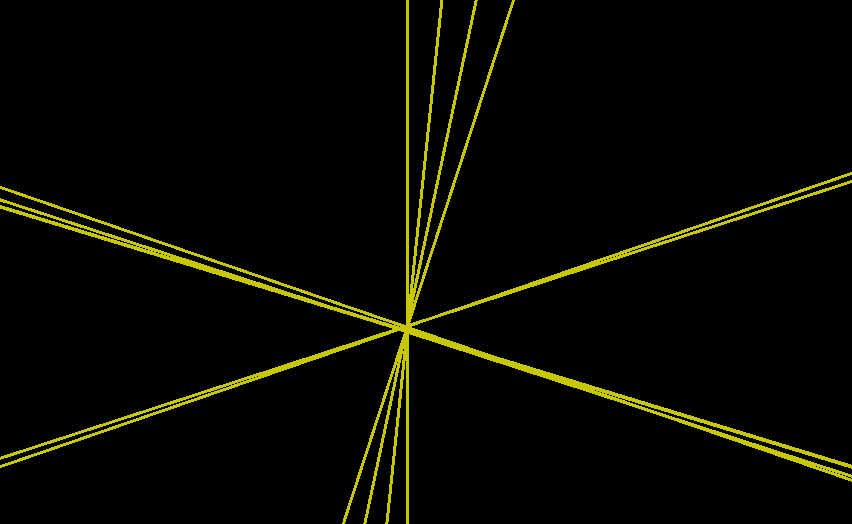

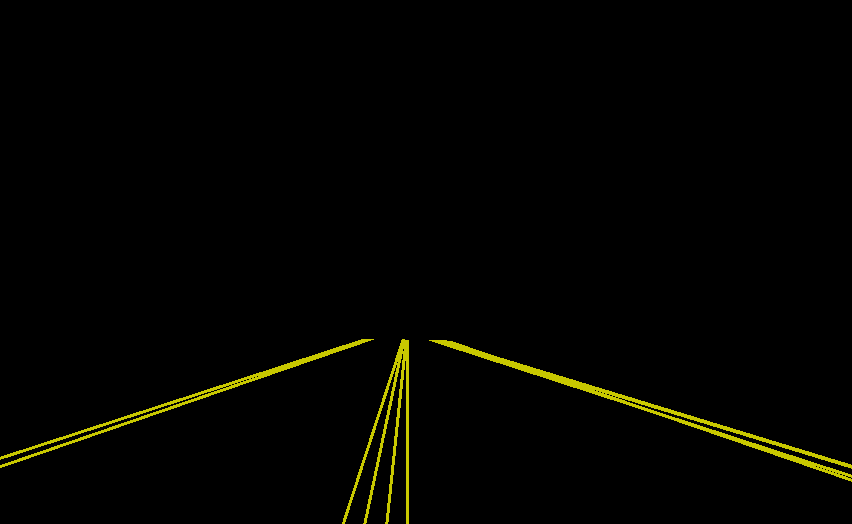

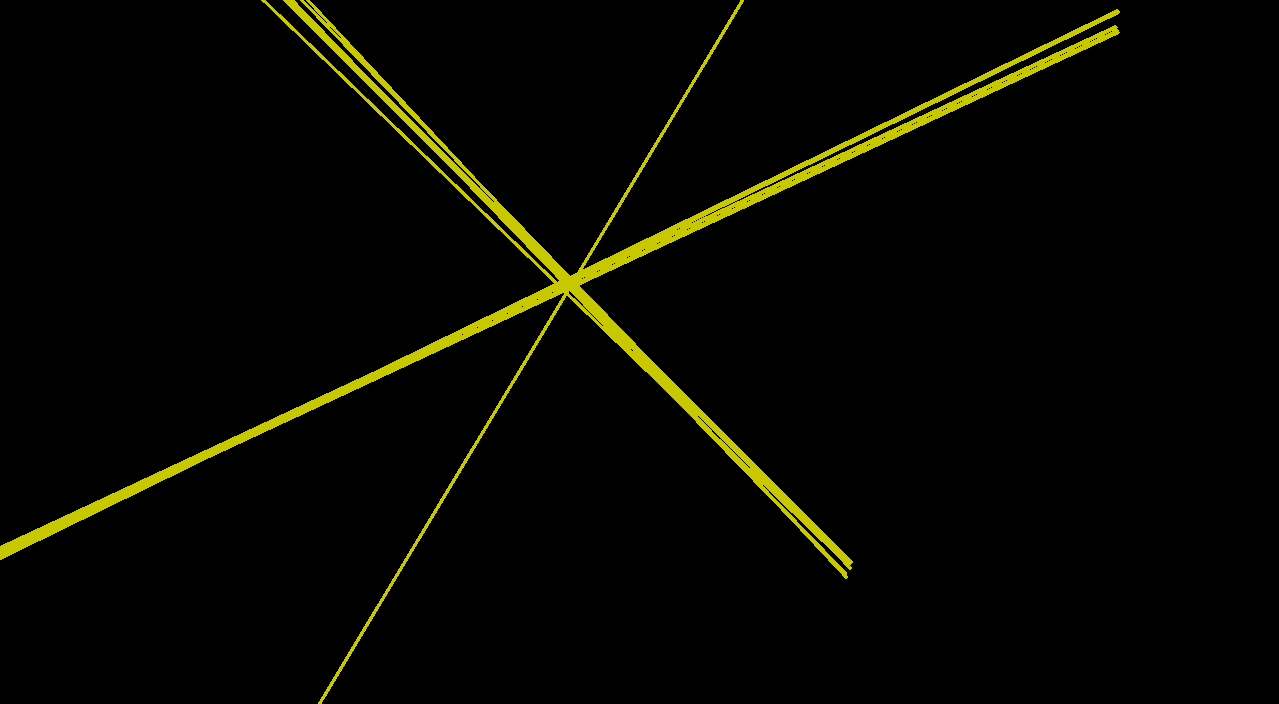

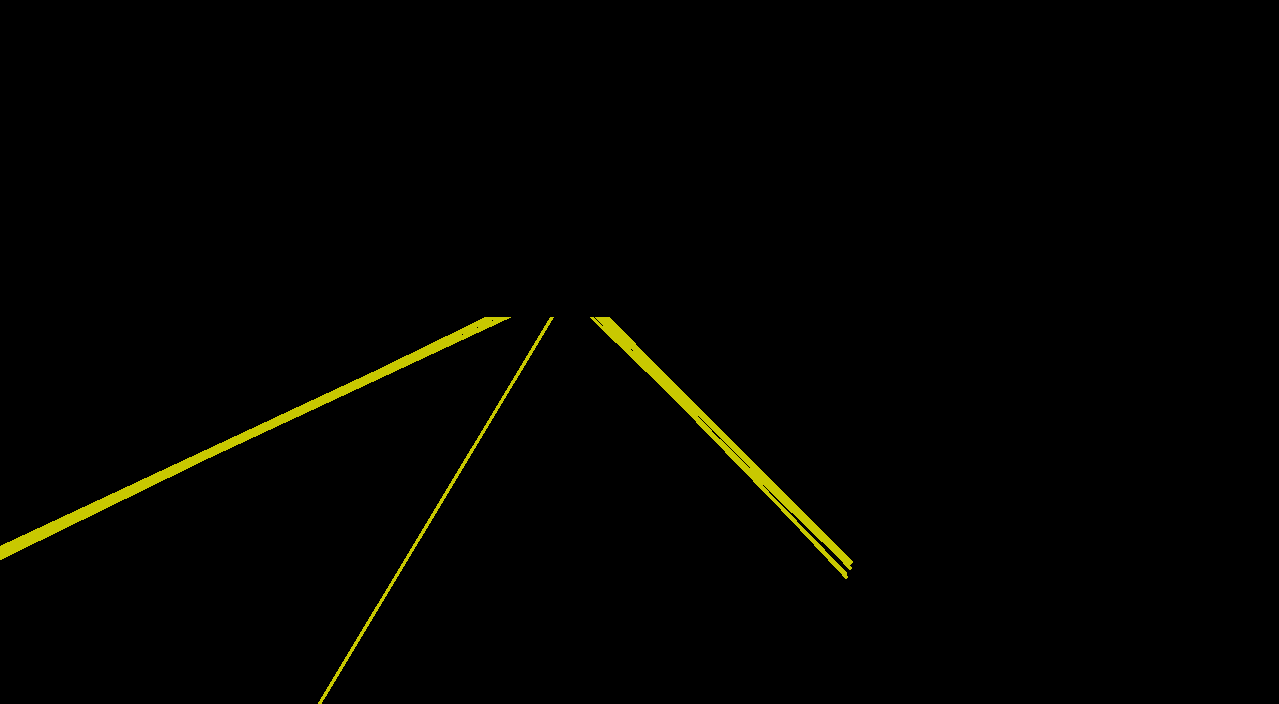

In [ ]:
 #hough_1 = cv2.HoughLines(region_interest_2, 1, np.pi / 180, 100)

roadImg_1 = cv2.imread(img_src1)
roadImg_2 = cv2.imread(img_src2)

height_1, width_1,_ = roadImg_1.shape
square_1 = np.array([ [(0, 330), (0, height_1), (width_1, height_1),  (width_1, 350) ] ])

height_2, width_2,_ = roadImg_2.shape
square_2 = np.array([ [(0, 317), (0, height_2), (1050, height_2),  (1050, 317) ] ])

blank_1, output_1 = draw_lines(roadImg_1, poss1, square_1)
blank_2, output_2 = draw_lines(roadImg_2, poss2, square_2)

cv2_imshow(blank_1)
cv2_imshow(output_1)
cv2_imshow(blank_2)
cv2_imshow(output_2)

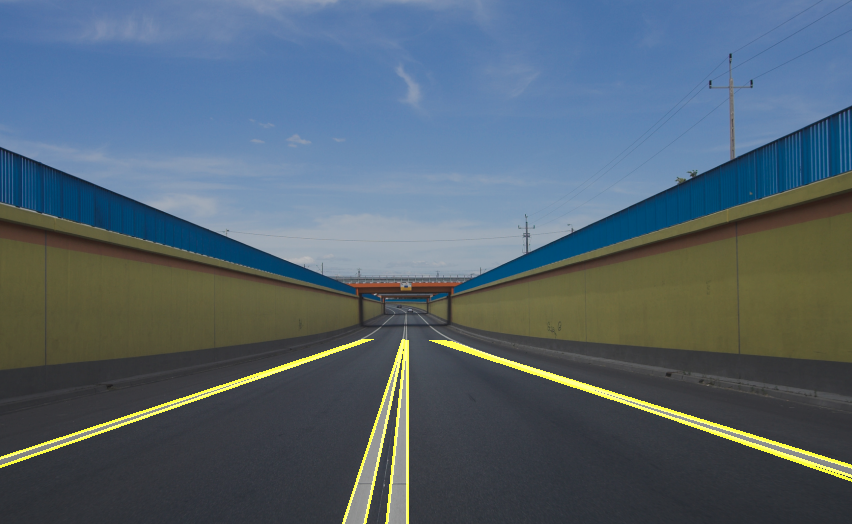

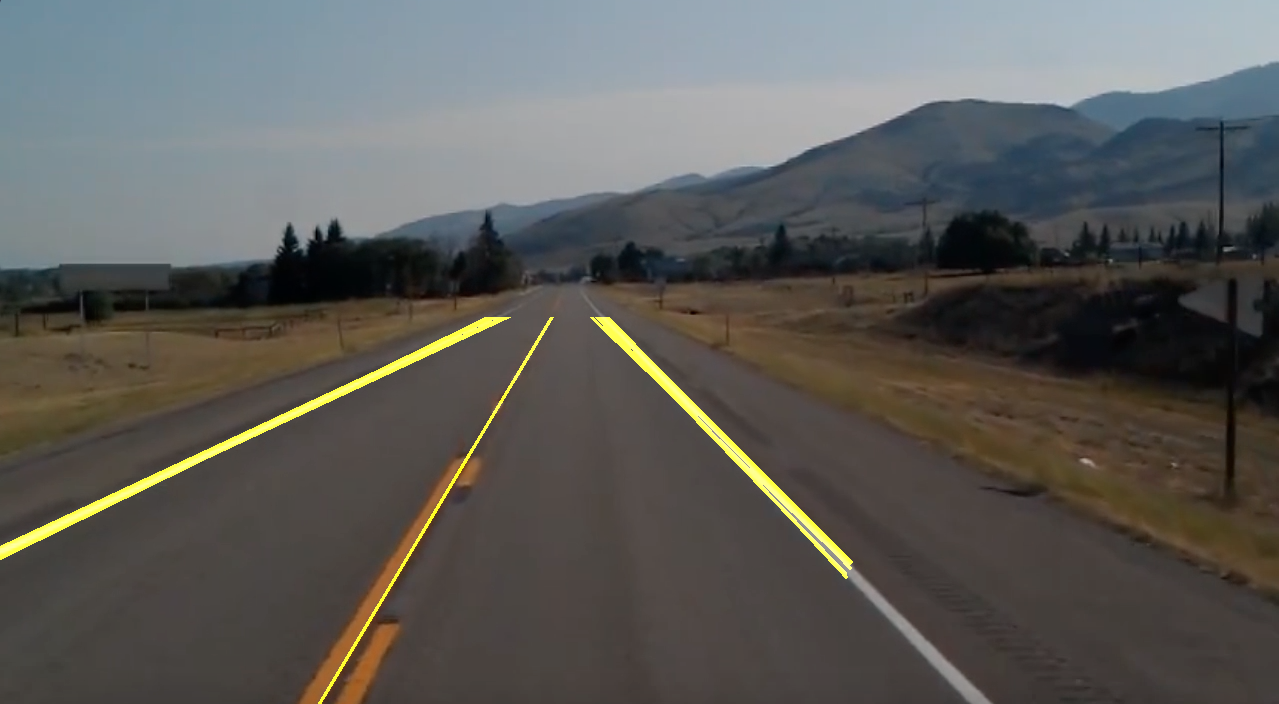

In [ ]:
detectedLines_1 = cv2.addWeighted(roadImg_1, 0.8, output_1, 1., 0.)
cv2_imshow(detectedLines_1)
detectedLines_2 = cv2.addWeighted(roadImg_2, 0.8, output_2, 1., 0.)
cv2_imshow(detectedLines_2)